## Final Project Submission

Please fill out:
* Student name: Alex Billinger
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:
* Video of presentation URL: https://1drv.ms/v/s!AnNzMk_uSRPHgnmYURnbFStdzgEA?e=gcNp5m

In [4]:
# used to import original data, clean it, and save the cleaned data
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
#print(df.info())

df.drop(['id','view','yr_renovated'],axis=1,inplace=True)
df.fillna(0,inplace=True)
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])
#print(df.info())
#df.head()
df.to_csv('kc_house_data_cleaned.csv',index=False)

In [42]:
#import and preview data set
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('kc_house_data_cleaned.csv')
df['date'] = pd.to_datetime(df['date'])

- yr_renovated     17755 non-null float64 mostly '0' value place holder, drop column
- waterfront       19221 non-null float64 median 0, fill nan with 0
- view             21534 non-null float64 not useful data, drop column
- id, lat, long not useful, drop columns
- Date to datetime format
- sqft_basement replace '?' place holder, convert to float
- dependent value/targe: price

- found important factors
### to do:
- pick specific questions and find data to answer them
- cross validation
- final model

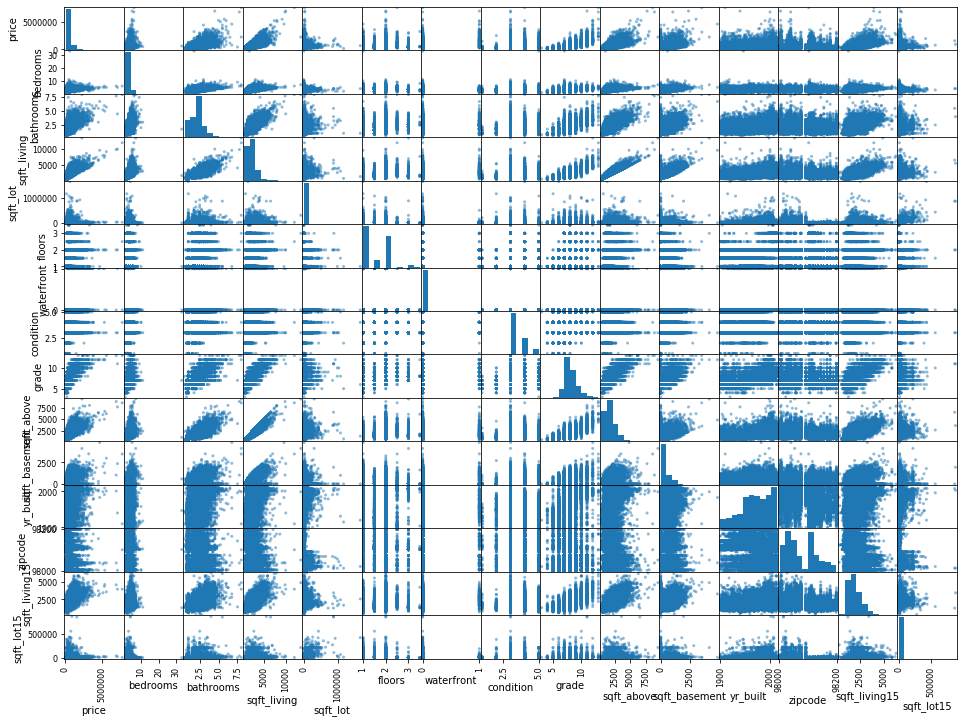

In [40]:
pd.plotting.scatter_matrix(df,figsize=(16,12))
plt.show()

### What factors have multicollinearity?

<function matplotlib.pyplot.show(*args, **kw)>

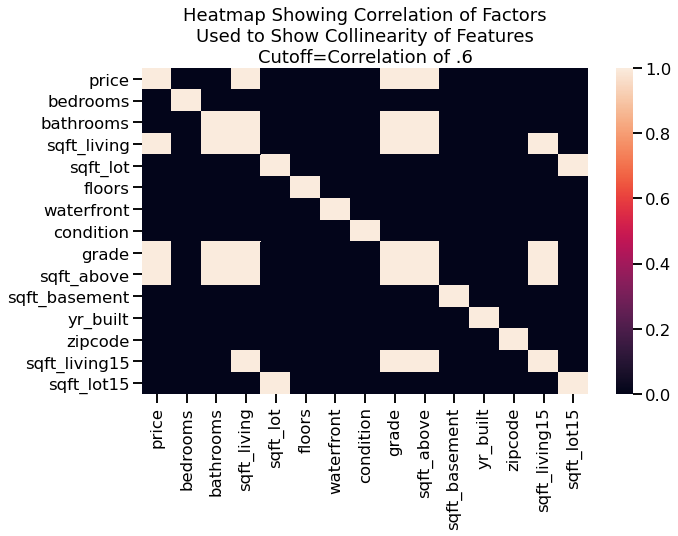

In [44]:
x = abs(df.corr())>.6
plt.figure(figsize=(10,6))
sns.set_context('talk')
sns.heatmap(x)
plt.title('Heatmap Showing Correlation of Factors\nUsed to Show Collinearity of Features\nCutoff=Correlation of .6')
plt.show

### Multicollinear
- sqft_living, bathrooms, grade, sqft_above,sqft_living15
- sqft_above, grade


In [11]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X = temp.drop(['price'],axis=1)
y = temp['price']
lst_predictors = stepwise_selection(X,y,verbose=False)
lst_predictors

D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


['floors',
 'sqft_living',
 'zip_98004',
 'zip_98023',
 'waterfront',
 'zip_98040',
 'zip_98002',
 'zip_98038',
 'zip_98112',
 'zip_98032',
 'zip_98039',
 'zip_98033',
 'zip_98199',
 'zip_98119',
 'zip_98105',
 'zip_98115',
 'zip_98103',
 'zip_98117',
 'zip_98006',
 'zip_98107',
 'zip_98109',
 'zip_98122',
 'zip_98116',
 'zip_98102',
 'sqft_lot',
 'zip_98052',
 'zip_98005',
 'zip_98136',
 'zip_98144',
 'zip_98075',
 'zip_98008',
 'zip_98074',
 'zip_98053',
 'zip_98177',
 'zip_98029',
 'zip_98034',
 'zip_98007',
 'zip_98125',
 'zip_98126',
 'zip_98027',
 'condition',
 'zip_98072',
 'zip_98077',
 'zip_98118',
 'zip_98133',
 'zip_98155',
 'zip_98011',
 'zip_98028',
 'zip_98065',
 'zip_98059',
 'zip_98024',
 'zip_98045',
 'zip_98056',
 'zip_98106',
 'zip_98166',
 'zip_98108',
 'zip_98146',
 'zip_98019',
 'zip_98070',
 'zip_98014',
 'zip_98010',
 'zip_98058',
 'zip_98055',
 'zip_98178',
 'zip_98148',
 'zip_98198']

In [222]:
# preview of simplest model
f='price~sqft_living'
model = ols(f,temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:51:09   Log-Likelihood:                -24083.
No. Observations:               21597   AIC:                         4.817e+04
Df Residuals:                   21595   BIC:                         4.819e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.35e-15      0.005   2.69e-13      1.000      -0.010       0.010
sqft_living     0.6748      0.005    134.368      0.000       0.665       0.685
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

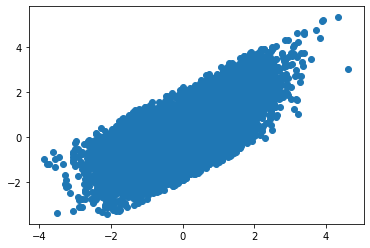

In [223]:
#scatter plot of simplest model
plt.scatter(temp['sqft_living'],temp['price'])

- import 'linreg_ready_data.csv'
- processed data from Blake
- includes categorical one-hot coded values for zipcodes
- outlier exclusion and log transforms of price and sqft_living

In [1]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('linreg_ready_data.csv')
# define our input variable (X) & output variable
X = df.drop(columns=['log_price','zipcode_98023','zipcode_98032'], axis=1)
Y = df[['log_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
f = 'log_price~'+'+'.join(X.columns)
model = ols(f,df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1287.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:34:01   Log-Likelihood:                 3670.4
No. Observations:               20110   AIC:                            -7201.
Df Residuals:                   20040   BIC:                            -6647.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.4407      0.031    241.932      0.000       7.380       7.501
log_sqft_living     0.6727      0.004    167.697      0.000       0.665       0.681
zipcode_98002      -0.0410      0.016     -2.587      0.010      -0.072      -0.010
zipcode_98003       0.0496      0.014      3.587      0.000       0.022       0.077
zipcode_98004       1.1751      0.015     77.816      0.000       1.145       1.205
zipcode_98005       0.8418      0.018     47.005      0.000       0.807       0.877
zipcode_98006       0.7639      0.012     63.897      0.000       0.740       0.787
zipcode_98007       0.7089      0.019     38.195      0.000       0.673       0.745
zipcode_98008       0.6944      0.014     49.952      0.000       0.667       0.722
zipcode_98010       0.2666      0.023     11.349      0.000       0.221       0.313
zipcode_98011       0.4747      0.016     29.660      0.000       0.443       0.506
zipcode_98014       0.3335      0.023     14.752      0.000       0.289       0.378
zipcode_98019       0.3259      0.017     19.147      0.000       0.293       0.359
zipcode_98022       0.0786      0.016      4.814      0.000       0.047       0.111
zipcode_98024       0.4518      0.030     14.977      0.000       0.393       0.511
zipcode_98027       0.5939      0.013     47.336      0.000       0.569       0.618
zipcode_98028       0.4406      0.014     31.964      0.000       0.414       0.468
zipcode_98029       0.6627      0.013     50.286      0.000       0.637       0.689
zipcode_98030       0.0504      0.014      3.522      0.000       0.022       0.078
zipcode_98031       0.0829      0.014      5.950      0.000       0.056       0.110
zipcode_98033       0.8446      0.012     70.332      0.000       0.821       0.868
zipcode_98034       0.5475      0.011     49.932      0.000       0.526       0.569
zipcode_98038       0.1695      0.011     15.612      0.000       0.148       0.191
zipcode_98039       1.3787      0.049     27.897      0.000       1.282       1.476
zipcode_98040       1.0359      0.015     67.997      0.000       1.006       1.066
zipcode_98042       0.0849      0.011      7.753      0.000       0.063       0.106
zipcode_98045       0.3724      0.016     23.287      0.000       0.341       0.404
zipcode_98052       0.7001      0.011     65.026      0.000       0.679       0.721
zipcode_98053       0.6618      0.013     51.761      0.000       0.637       0.687
zipcode_98055       0.1438      0.014     10.236      0.000       0.116       0.171
zipcode_98056       0.3456      0.012     28.742      0.000       0.322       0.369
zipcode_98058       0.1833      0.012     15.735      0.000       0.160       0.206
zipcode_98059       0.3703      0.012     31.666      0.000       0.347       0.393
zipcode_98065       0.4351      0.014     31.699      0.000